In [16]:
import numpy
import scipy.stats
import matplotlib.pyplot
import sklearn.datasets
import sklearn.model_selection
import utils
from GP_Beta_cal import GP_Beta
from sklearn.isotonic import IsotonicRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Load the boston dataset and split into training and testing sets.

In [2]:
(x_raw, y_raw) = sklearn.datasets.load_boston(return_X_y=True)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_raw, y_raw.ravel(),
                                                                            test_size=0.25, shuffle=True)

y_train = y_train.reshape(-1, 1)

y_test = y_test.reshape(-1, 1)

Train a simple dense neural net, and obtain its prediction (mean and std) using MC dropout.  

In [3]:
base_model = utils.get_mdl(x_train, y_train, 'olr') # change 'olr' to 'deep' / 'br' / 'gp' for other base models

Create a calibration set by collecting model prediction (mean and std) using MC dropout.  

In [4]:
mu_cal, sigma_cal = utils.get_prediction(x_train, base_model)

Specify the bins edges to calculate the corresponding PDF / CDF values

In [5]:
n_t_test = 1024

t_list_test = numpy.linspace(numpy.min(mu_cal) - 16.0 * numpy.max(sigma_cal),
                             numpy.max(mu_cal) + 16.0 * numpy.max(sigma_cal),
                             n_t_test).reshape(1, -1)

Train the GP-Beta calibrator

In [6]:
n_u = 8 # number of induced points
GP_Beta_mdl = GP_Beta()
GP_Beta_mdl.fit(y_train, mu_cal, sigma_cal, n_u=n_u)

tf.Tensor([ 1.    1.    1.36 -1.15  1.1   1.    1.    1.  ], shape=(8,), dtype=float64)
tf.Tensor([1.00e+00 1.00e-03 9.99e-01 1.00e-03 1.00e+00 1.00e-03], shape=(6,), dtype=float64)
Batch: 0, optimiser: adam, Loss: 3.07376565941576


C:\Users\hs12248\Google Drive\Workspace\Github\DistCal\GP_Beta_cal.py:624: UserWarning: Attempting to set identical bottom == top == 3.07376565941576 results in singular transformations; automatically expanding.
  matplotlib.pyplot.ylim([numpy.min(batch_L), numpy.median(batch_L)])


tf.Tensor([ 1.    1.    1.35 -1.15  1.1   1.    1.    1.  ], shape=(8,), dtype=float64)
tf.Tensor([1. 0. 1. 0. 1. 0.], shape=(6,), dtype=float64)
Batch: 1, optimiser: adam, Loss: 3.07286883775586
tf.Tensor([ 1.    1.    1.35 -1.15  1.1   1.    1.    1.  ], shape=(8,), dtype=float64)
tf.Tensor([1. 0. 1. 0. 1. 0.], shape=(6,), dtype=float64)
Batch: 2, optimiser: adam, Loss: 3.0706425291690413
tf.Tensor([ 1.    1.    1.35 -1.15  1.1   1.    1.    1.  ], shape=(8,), dtype=float64)
tf.Tensor([1. 0. 1. 0. 1. 0.], shape=(6,), dtype=float64)
Batch: 3, optimiser: adam, Loss: 3.06906560271751
tf.Tensor([ 1.    1.    1.35 -1.15  1.1   1.    1.    1.  ], shape=(8,), dtype=float64)
tf.Tensor([1. 0. 1. 0. 1. 0.], shape=(6,), dtype=float64)
Batch: 4, optimiser: adam, Loss: 3.0689518918782888
tf.Tensor([ 1.    1.    1.35 -1.15  1.09  1.    1.    1.  ], shape=(8,), dtype=float64)
tf.Tensor([1. 0. 1. 0. 1. 0.], shape=(6,), dtype=float64)
Batch: 5, optimiser: adam, Loss: 3.0659652800319437
tf.Tensor([ 1.

tf.Tensor([ 0.99  0.99  1.34 -1.14  1.09  1.01  0.99  0.99], shape=(8,), dtype=float64)
tf.Tensor([1.01 0.01 0.99 0.01 1.01 0.01], shape=(6,), dtype=float64)
Batch: 24, optimiser: adam, Loss: 3.0399634074971313
tf.Tensor([ 0.99  0.99  1.34 -1.14  1.08  1.01  0.99  0.99], shape=(8,), dtype=float64)
tf.Tensor([1.01 0.01 0.99 0.01 1.01 0.01], shape=(6,), dtype=float64)
Batch: 25, optimiser: adam, Loss: 3.0386262690983386
tf.Tensor([ 0.99  0.99  1.34 -1.14  1.08  1.01  0.99  0.99], shape=(8,), dtype=float64)
tf.Tensor([1.01 0.01 0.99 0.01 1.01 0.01], shape=(6,), dtype=float64)
Batch: 26, optimiser: adam, Loss: 3.0384275031855053
tf.Tensor([ 0.98  0.98  1.34 -1.14  1.08  1.02  0.99  0.98], shape=(8,), dtype=float64)
tf.Tensor([1.02 0.02 0.98 0.01 1.02 0.02], shape=(6,), dtype=float64)
Batch: 27, optimiser: adam, Loss: 3.034835519938187
tf.Tensor([ 0.98  0.98  1.34 -1.14  1.08  1.02  0.99  0.98], shape=(8,), dtype=float64)
tf.Tensor([1.02 0.02 0.98 0.01 1.02 0.02], shape=(6,), dtype=float64)

tf.Tensor([ 0.97  0.97  1.33 -1.12  1.07  1.03  0.98  0.97], shape=(8,), dtype=float64)
tf.Tensor([1.03 0.03 0.97 0.01 1.03 0.03], shape=(6,), dtype=float64)
Batch: 45, optimiser: adam, Loss: 3.0133650687288367
Previous And Recent Top Averaged Loss Is:
[3.06 3.01]
tf.Tensor([ 0.97  0.97  1.33 -1.12  1.07  1.03  0.98  0.97], shape=(8,), dtype=float64)
tf.Tensor([1.03 0.03 0.97 0.02 1.03 0.03], shape=(6,), dtype=float64)
Batch: 46, optimiser: adam, Loss: 3.0115242044921904
Previous And Recent Top Averaged Loss Is:
[3.05 3.01]
tf.Tensor([ 0.97  0.97  1.33 -1.12  1.07  1.03  0.98  0.97], shape=(8,), dtype=float64)
tf.Tensor([1.03 0.03 0.97 0.02 1.03 0.03], shape=(6,), dtype=float64)
Batch: 47, optimiser: adam, Loss: 3.0104304865760403
Previous And Recent Top Averaged Loss Is:
[3.05 3.01]
tf.Tensor([ 0.97  0.97  1.33 -1.12  1.07  1.03  0.98  0.97], shape=(8,), dtype=float64)
tf.Tensor([1.03 0.03 0.97 0.02 1.03 0.03], shape=(6,), dtype=float64)
Batch: 48, optimiser: adam, Loss: 3.00821152074

Previous And Recent Top Averaged Loss Is:
[3.03 2.99]
tf.Tensor([ 0.96  0.96  1.32 -1.11  1.06  1.04  0.98  0.96], shape=(8,), dtype=float64)
tf.Tensor([1.04 0.04 0.96 0.03 1.04 0.04], shape=(6,), dtype=float64)
Batch: 65, optimiser: adam, Loss: 2.9871495759750526
Previous And Recent Top Averaged Loss Is:
[3.03 2.99]
tf.Tensor([ 0.96  0.96  1.31 -1.11  1.06  1.04  0.98  0.96], shape=(8,), dtype=float64)
tf.Tensor([1.04 0.04 0.96 0.03 1.04 0.04], shape=(6,), dtype=float64)
Batch: 66, optimiser: adam, Loss: 2.987546013232032
Previous And Recent Top Averaged Loss Is:
[3.03 2.99]
tf.Tensor([ 0.96  0.96  1.31 -1.11  1.06  1.04  0.98  0.96], shape=(8,), dtype=float64)
tf.Tensor([1.04 0.04 0.96 0.03 1.04 0.04], shape=(6,), dtype=float64)
Batch: 67, optimiser: adam, Loss: 2.984271233024738
Previous And Recent Top Averaged Loss Is:
[3.02 2.98]
tf.Tensor([ 0.96  0.96  1.31 -1.11  1.06  1.04  0.98  0.96], shape=(8,), dtype=float64)
tf.Tensor([1.04 0.04 0.96 0.03 1.04 0.04], shape=(6,), dtype=floa

Previous And Recent Top Averaged Loss Is:
[3.   2.97]
tf.Tensor([ 0.95  0.94  1.3  -1.09  1.05  1.06  0.99  0.95], shape=(8,), dtype=float64)
tf.Tensor([1.06 0.06 0.94 0.03 1.06 0.04], shape=(6,), dtype=float64)
Batch: 85, optimiser: adam, Loss: 2.9663145782997518
Previous And Recent Top Averaged Loss Is:
[3.   2.97]
tf.Tensor([ 0.95  0.94  1.3  -1.09  1.05  1.06  0.99  0.95], shape=(8,), dtype=float64)
tf.Tensor([1.06 0.06 0.94 0.04 1.06 0.04], shape=(6,), dtype=float64)
Batch: 86, optimiser: adam, Loss: 2.9645809379724746
Previous And Recent Top Averaged Loss Is:
[3.   2.96]
tf.Tensor([ 0.95  0.94  1.3  -1.09  1.05  1.06  0.99  0.95], shape=(8,), dtype=float64)
tf.Tensor([1.06 0.06 0.94 0.03 1.06 0.04], shape=(6,), dtype=float64)
Batch: 87, optimiser: adam, Loss: 2.9647859961028646
Previous And Recent Top Averaged Loss Is:
[3.   2.96]
tf.Tensor([ 0.95  0.94  1.3  -1.09  1.05  1.06  0.99  0.95], shape=(8,), dtype=float64)
tf.Tensor([1.06 0.06 0.94 0.03 1.06 0.04], shape=(6,), dtype=fl

tf.Tensor([ 0.95  0.93  1.28 -1.08  1.05  1.08  0.99  0.94], shape=(8,), dtype=float64)
tf.Tensor([1.08 0.08 0.92 0.04 1.08 0.05], shape=(6,), dtype=float64)
Batch: 105, optimiser: adam, Loss: 2.9461643122345964
Previous And Recent Top Averaged Loss Is:
[2.98 2.95]
tf.Tensor([ 0.95  0.93  1.28 -1.08  1.05  1.08  0.99  0.94], shape=(8,), dtype=float64)
tf.Tensor([1.08 0.08 0.92 0.05 1.08 0.05], shape=(6,), dtype=float64)
Batch: 106, optimiser: adam, Loss: 2.9467756012695765
Previous And Recent Top Averaged Loss Is:
[2.98 2.95]
tf.Tensor([ 0.95  0.93  1.28 -1.08  1.05  1.08  0.99  0.94], shape=(8,), dtype=float64)
tf.Tensor([1.08 0.08 0.92 0.05 1.08 0.06], shape=(6,), dtype=float64)
Batch: 107, optimiser: adam, Loss: 2.943591993531287
Previous And Recent Top Averaged Loss Is:
[2.98 2.94]
tf.Tensor([ 0.95  0.93  1.28 -1.08  1.05  1.08  0.99  0.94], shape=(8,), dtype=float64)
tf.Tensor([1.08 0.08 0.92 0.05 1.08 0.05], shape=(6,), dtype=float64)
Batch: 108, optimiser: adam, Loss: 2.94310427

Previous And Recent Top Averaged Loss Is:
[2.96 2.93]
tf.Tensor([ 0.97  0.93  1.26 -1.06  1.05  1.1   1.    0.93], shape=(8,), dtype=float64)
tf.Tensor([1.1  0.1  0.9  0.05 1.1  0.06], shape=(6,), dtype=float64)
Batch: 125, optimiser: adam, Loss: 2.9292263492169344
Previous And Recent Top Averaged Loss Is:
[2.96 2.93]
tf.Tensor([ 0.97  0.93  1.26 -1.06  1.05  1.1   1.01  0.94], shape=(8,), dtype=float64)
tf.Tensor([1.1  0.1  0.9  0.06 1.1  0.06], shape=(6,), dtype=float64)
Batch: 126, optimiser: adam, Loss: 2.928227071057185
Previous And Recent Top Averaged Loss Is:
[2.96 2.93]
tf.Tensor([ 0.97  0.93  1.26 -1.06  1.05  1.1   1.01  0.93], shape=(8,), dtype=float64)
tf.Tensor([1.1  0.1  0.9  0.06 1.1  0.06], shape=(6,), dtype=float64)
Batch: 127, optimiser: adam, Loss: 2.926027373054582
Previous And Recent Top Averaged Loss Is:
[2.96 2.93]
tf.Tensor([ 0.97  0.93  1.25 -1.06  1.05  1.1   1.01  0.94], shape=(8,), dtype=float64)
tf.Tensor([1.1  0.1  0.9  0.06 1.1  0.06], shape=(6,), dtype=f

Previous And Recent Top Averaged Loss Is:
[2.94 2.91]
tf.Tensor([ 0.99  0.93  1.24 -1.05  1.05  1.12  1.02  0.93], shape=(8,), dtype=float64)
tf.Tensor([1.12 0.12 0.88 0.07 1.11 0.07], shape=(6,), dtype=float64)
Batch: 145, optimiser: adam, Loss: 2.9114737188456594
Previous And Recent Top Averaged Loss Is:
[2.94 2.91]
tf.Tensor([ 0.99  0.93  1.24 -1.05  1.05  1.12  1.02  0.93], shape=(8,), dtype=float64)
tf.Tensor([1.12 0.12 0.88 0.07 1.12 0.07], shape=(6,), dtype=float64)
Batch: 146, optimiser: adam, Loss: 2.91186999554344
Previous And Recent Top Averaged Loss Is:
[2.94 2.91]
tf.Tensor([ 0.99  0.93  1.24 -1.05  1.05  1.12  1.02  0.93], shape=(8,), dtype=float64)
tf.Tensor([1.12 0.12 0.88 0.07 1.12 0.07], shape=(6,), dtype=float64)
Batch: 147, optimiser: adam, Loss: 2.9125314044179955
Previous And Recent Top Averaged Loss Is:
[2.94 2.91]
tf.Tensor([ 0.99  0.93  1.23 -1.05  1.05  1.12  1.03  0.93], shape=(8,), dtype=float64)
tf.Tensor([1.12 0.12 0.88 0.07 1.12 0.07], shape=(6,), dtype=f

Previous And Recent Top Averaged Loss Is:
[2.92 2.9 ]
NaN in gradient.
tf.Tensor([ 1.    0.93  1.22 -1.05  1.05  1.13  1.04  0.92], shape=(8,), dtype=float64)
tf.Tensor([1.13 0.13 0.87 0.08 1.12 0.08], shape=(6,), dtype=float64)
Batch: 165, optimiser: adam, Loss: 2.902805863010069
Previous And Recent Top Averaged Loss Is:
[2.92 2.9 ]
tf.Tensor([ 1.    0.93  1.22 -1.05  1.05  1.14  1.04  0.92], shape=(8,), dtype=float64)
tf.Tensor([1.14 0.14 0.86 0.08 1.12 0.08], shape=(6,), dtype=float64)
Batch: 166, optimiser: adam, Loss: 2.9028273565259335
Previous And Recent Top Averaged Loss Is:
[2.92 2.9 ]
NaN in gradient.
tf.Tensor([ 1.    0.93  1.22 -1.05  1.05  1.13  1.04  0.92], shape=(8,), dtype=float64)
tf.Tensor([1.13 0.13 0.87 0.08 1.12 0.08], shape=(6,), dtype=float64)
Batch: 167, optimiser: adam, Loss: 2.902883372849586
Previous And Recent Top Averaged Loss Is:
[2.92 2.9 ]
NaN in gradient.
tf.Tensor([ 1.    0.93  1.22 -1.05  1.05  1.13  1.04  0.92], shape=(8,), dtype=float64)
tf.Tensor([

Previous And Recent Top Averaged Loss Is:
[2.91 2.9 ]
tf.Tensor([ 1.01  0.94  1.21 -1.04  1.05  1.15  1.05  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.15 0.15 0.85 0.09 1.13 0.09], shape=(6,), dtype=float64)
Batch: 185, optimiser: adam, Loss: 2.8937043095678017
Previous And Recent Top Averaged Loss Is:
[2.91 2.89]
tf.Tensor([ 1.01  0.94  1.21 -1.05  1.05  1.15  1.05  0.92], shape=(8,), dtype=float64)
tf.Tensor([1.15 0.15 0.85 0.09 1.13 0.09], shape=(6,), dtype=float64)
Batch: 186, optimiser: adam, Loss: 2.894821033967528
Previous And Recent Top Averaged Loss Is:
[2.91 2.89]
NaN in gradient.
tf.Tensor([ 1.01  0.94  1.21 -1.04  1.05  1.15  1.05  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.15 0.15 0.85 0.09 1.13 0.09], shape=(6,), dtype=float64)
Batch: 187, optimiser: adam, Loss: 2.8958378633172597
Previous And Recent Top Averaged Loss Is:
[2.91 2.89]
tf.Tensor([ 1.01  0.94  1.21 -1.05  1.05  1.15  1.05  0.92], shape=(8,), dtype=float64)
tf.Tensor([1.15 0.15 0.85 0.09 1.13 0.09], s

tf.Tensor([ 1.02  0.94  1.2  -1.04  1.05  1.16  1.05  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 205, optimiser: adam, Loss: 2.889587304444239
Previous And Recent Top Averaged Loss Is:
[2.9  2.89]
NaN in gradient.
tf.Tensor([ 1.02  0.94  1.2  -1.04  1.05  1.16  1.06  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.09], shape=(6,), dtype=float64)
Batch: 206, optimiser: adam, Loss: 2.8893098366348493
Previous And Recent Top Averaged Loss Is:
[2.9  2.89]
NaN in gradient.
tf.Tensor([ 1.02  0.94  1.2  -1.04  1.05  1.16  1.06  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.09], shape=(6,), dtype=float64)
Batch: 207, optimiser: adam, Loss: 2.8899704054422797
Previous And Recent Top Averaged Loss Is:
[2.9  2.89]
tf.Tensor([ 1.02  0.94  1.2  -1.04  1.05  1.16  1.06  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 208,

tf.Tensor([ 1.03  0.94  1.2  -1.04  1.05  1.16  1.06  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 224, optimiser: adam, Loss: 2.887454416354349
Previous And Recent Top Averaged Loss Is:
[2.89 2.89]
NaN in gradient.
tf.Tensor([ 1.03  0.94  1.2  -1.04  1.05  1.16  1.06  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 225, optimiser: adam, Loss: 2.888040199749
Previous And Recent Top Averaged Loss Is:
[2.89 2.89]
NaN in gradient.
tf.Tensor([ 1.03  0.94  1.2  -1.04  1.05  1.16  1.06  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 226, optimiser: adam, Loss: 2.888183756599719
Previous And Recent Top Averaged Loss Is:
[2.89 2.89]
tf.Tensor([ 1.03  0.94  1.2  -1.04  1.05  1.16  1.06  0.91], shape=(8,), dtype=float64)
tf.Tensor([1.16 0.16 0.84 0.1  1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 227, opti

Previous And Recent Top Averaged Loss Is:
[2.89 2.88]
tf.Tensor([ 1.03  0.94  1.19 -1.04  1.05  1.17  1.06  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 244, optimiser: adam, Loss: 2.881898527897263
Previous And Recent Top Averaged Loss Is:
[2.89 2.88]
NaN in gradient.
tf.Tensor([ 1.03  0.94  1.19 -1.04  1.05  1.17  1.06  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 245, optimiser: adam, Loss: 2.8855215714801212
Previous And Recent Top Averaged Loss Is:
[2.89 2.88]
NaN in gradient.
tf.Tensor([ 1.03  0.94  1.19 -1.04  1.05  1.17  1.06  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.1 ], shape=(6,), dtype=float64)
Batch: 246, optimiser: adam, Loss: 2.884292560952552
Previous And Recent Top Averaged Loss Is:
[2.89 2.88]
NaN in gradient.
tf.Tensor([ 1.03  0.94  1.19 -1.04  1.05  1.17  1.06  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([

NaN in gradient.
tf.Tensor([ 1.04  0.94  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 263, optimiser: adam, Loss: 2.8824709074765047
Previous And Recent Top Averaged Loss Is:
[2.89 2.88]
tf.Tensor([ 1.04  0.94  1.19 -1.04  1.04  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.15 0.11], shape=(6,), dtype=float64)
Batch: 264, optimiser: adam, Loss: 2.881697131010477
Previous And Recent Top Averaged Loss Is:
[2.89 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.94  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 265, optimiser: adam, Loss: 2.88171209092385
Previous And Recent Top Averaged Loss Is:
[2.89 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.94  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float

NaN in gradient.
tf.Tensor([ 1.04  0.94  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.15 0.11], shape=(6,), dtype=float64)
Batch: 282, optimiser: adam, Loss: 2.8820781645075515
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.15 0.11], shape=(6,), dtype=float64)
Batch: 283, optimiser: adam, Loss: 2.8811386469834903
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.94  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.15 0.11], shape=(6,), dtype=float64)
Batch: 284, optimiser: adam, Loss: 2.880864396277986
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.94  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.15 0.11], shape=(6,), dtype=flo

Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 301, optimiser: adam, Loss: 2.881130392081544
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 302, optimiser: adam, Loss: 2.880241715221276
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 303, optimiser: adam, Loss: 2.8805480903971943
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=flo

NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 320, optimiser: adam, Loss: 2.880237901817528
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 321, optimiser: adam, Loss: 2.8815516888355446
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
tf.Tensor([ 1.04  0.95  1.18 -1.04  1.05  1.18  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.18 0.18 0.82 0.11 1.15 0.11], shape=(6,), dtype=float64)
Batch: 322, optimiser: adam, Loss: 2.880803369304638
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=floa

Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 339, optimiser: adam, Loss: 2.881733929490167
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 340, optimiser: adam, Loss: 2.8802392761525284
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=float64)
tf.Tensor([1.17 0.17 0.83 0.11 1.14 0.11], shape=(6,), dtype=float64)
Batch: 341, optimiser: adam, Loss: 2.8802675748720317
Previous And Recent Top Averaged Loss Is:
[2.88 2.88]
NaN in gradient.
tf.Tensor([ 1.04  0.95  1.19 -1.04  1.05  1.17  1.07  0.9 ], shape=(8,), dtype=fl

Train the isotonic quantile calibrator

In [7]:
iso_q, iso_q_hat = utils.get_iso_cal_table(y_train, mu_cal, sigma_cal)

iso_mdl = IsotonicRegression(out_of_bounds='clip')

iso_mdl.fit(iso_q, iso_q_hat)

IsotonicRegression(increasing=True, out_of_bounds='clip', y_max=None,
                   y_min=None)

Obtain base model prediction on the testing set, as well as predicted PDF and CDF

In [8]:
mu_base, sigma_base = utils.get_prediction(x_test, base_model)

y_base = mu_base.ravel()

q_base, s_base = utils.get_norm_q(mu_base.ravel(), sigma_base.ravel(), t_list_test.ravel())

Apply GP-Beta calibrator to get predicted target value, negtive log-likelihood, PDF and CDF

In [17]:
s_gp, q_gp = GP_Beta_mdl.predict(t_list_test, mu_base, sigma_base)

y_gp = utils.get_y_hat(t_list_test.ravel(), s_gp)

Apply isotonic calibrator to get predicted target value, negtive log-likelihood, PDF and CDF

In [18]:
q_iso = iso_mdl.predict(q_base.ravel()).reshape(numpy.shape(q_base))

s_iso = numpy.diff(q_iso, axis=1) / \
        (t_list_test[0, 1:] - t_list_test[0, :-1]).ravel().reshape(1, -1).repeat(len(y_test), axis=0)

y_iso = utils.get_y_hat(t_list_test.ravel(), s_iso)

Plot PDF / calibration map / CDF for first 3 test instances

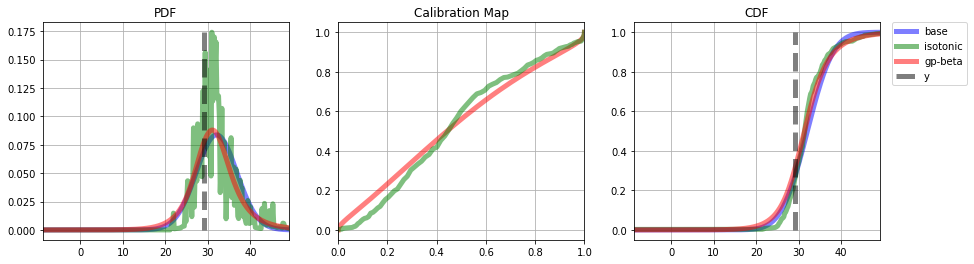

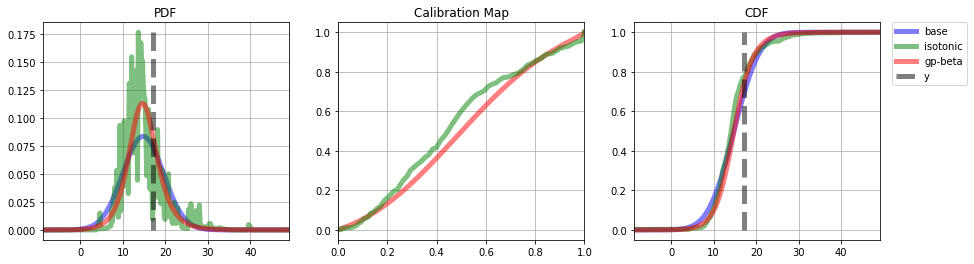

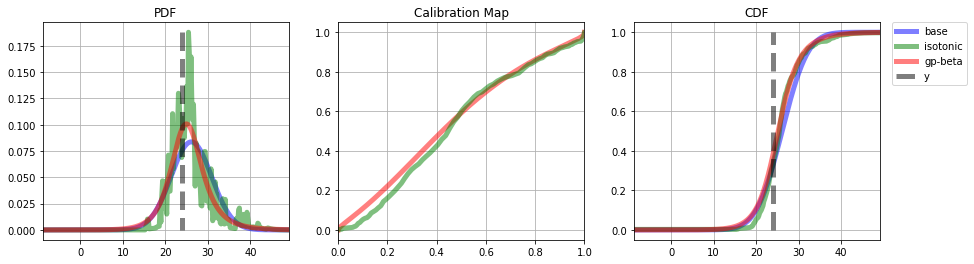

In [27]:
t_list = t_list_test.copy()

y = y_test.copy()

t_list_mid = (t_list[0, 1:] + t_list[0, 0:-1]) / 2

t_list = t_list.ravel()

for i in numpy.random.permutation(numpy.arange(0, len(y)))[:3]:

    fig, ax_list = matplotlib.pyplot.subplots(1, 3, figsize=(15, 4))

    ax_list[2].plot(t_list, q_base[i, :], 'b', alpha=0.5, linewidth=5)

    ax_list[2].plot(t_list, q_iso[i, :], 'g', alpha=0.5, linewidth=5)

    ax_list[2].plot(t_list, q_gp[i, :], 'r', alpha=0.5, linewidth=5)

    ax_list[2].plot([y[i], y[i]], [0, 1], 'k--', linewidth=5, alpha=0.5)

    ax_list[0].plot(t_list, s_base[i, :], 'b', alpha=0.5, linewidth=5)

    ax_list[0].plot(t_list_mid, s_iso[i, :], 'g', alpha=0.5, linewidth=5)

    ax_list[0].plot(t_list, s_gp[i, :], 'r', alpha=0.5, linewidth=5)

    max_density = numpy.max(numpy.concatenate([s_base[i, :].ravel(), s_iso[i, :].ravel(), s_gp[i, :].ravel()]))

    ax_list[0].plot([y[i], y[i]], [max_density, 0], 'k--', linewidth=5, alpha=0.5)

    ax_list[0].set_title('PDF')

    ax_list[1].plot(q_base[i, :], q_gp[i, :], 'r', alpha=0.5, linewidth=5)

    ax_list[1].plot(q_base[i, :], q_iso[i, :], 'g', alpha=0.5, linewidth=5)

    ax_list[0].set_xlim([numpy.min(mu_cal) - numpy.max(sigma_cal), 
                         numpy.max(mu_cal) + numpy.max(sigma_cal)])
    
    ax_list[2].set_xlim([numpy.min(mu_cal) - numpy.max(sigma_cal), 
                         numpy.max(mu_cal) + numpy.max(sigma_cal)])

    ax_list[1].set_xlim([0, 1])

    ax_list[1].set_title('Calibration Map')

    ax_list[2].set_title('CDF')

    ax_list[2].legend(['base', 'isotonic', 'gp-beta', 'y'],
                        bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax_list[0].grid(True)

    ax_list[1].grid(True)

    ax_list[2].grid(True)

Evaluate negative log-likelihood, pin-ball loss, and MSE

In [28]:
ll_base = - scipy.stats.norm.logpdf(y_test.reshape(-1, 1),
                                    loc=mu_base.reshape(-1, 1),
                                    scale=sigma_base.reshape(-1, 1)).ravel()
ll_iso = utils.get_log_loss(y_test, t_list_test.ravel(), s_iso)
ll_gp = utils.get_log_loss(y_test, t_list_test.ravel(), s_gp)
print([numpy.mean(ll_base), numpy.mean(ll_iso), numpy.mean(ll_gp)])

[2.9180782224430937, 3.1879355189242258, 2.749068434499746]


In [29]:
pbl_base = utils.get_pin_ball_loss(y_test, q_base, t_list_test.ravel())
pbl_iso = utils.get_pin_ball_loss(y_test, q_iso, t_list_test.ravel())
pbl_gp = utils.get_pin_ball_loss(y_test, q_gp, t_list_test.ravel())
print([pbl_base[0], pbl_iso[0], pbl_gp[0]])

[156.23681995735856, 151.6178377176694, 145.12958346418304]


In [30]:
se_base = utils.get_se(y_base, y_test)
se_iso = utils.get_se(y_iso, y_test)
se_gp = utils.get_se(y_gp, y_test)
print([numpy.mean(se_base), numpy.mean(se_iso), numpy.mean(se_gp)])

[19.878142747595334, 19.82594643204267, 18.912419369113657]
